In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
bikes=pd.read_csv('bikes.csv')
bikes

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.000000
1,2011-01-04,2.896673,54.267219,15.136882,108.000000
2,2011-01-05,4.235654,45.697702,17.034578,82.000000
3,2011-01-06,3.112643,50.237349,10.091568,88.000000
4,2011-01-07,2.723918,49.144928,15.738204,148.000000
5,2011-01-08,1.967445,48.851252,17.035029,112.333333
6,2011-01-09,1.210973,48.557576,18.331855,76.666667
7,2011-01-10,0.454501,48.263900,19.628680,41.000000
8,2011-01-11,1.361393,59.623460,12.414597,43.000000
9,2011-01-12,1.541997,54.775880,25.432188,25.000000


In [3]:
bikes.describe()

,temperature,humidity,windspeed,count
count,191.000000,191.000000,191.000000,191.000000
mean,15.319033,55.469244,18.605591,461.976440
std,9.876723,7.998748,5.049424,321.669925
min,-2.200000,21.300000,6.941802,9.000000
25%,6.091402,49.593148,14.600733,144.000000
50%,15.769749,55.080463,18.474898,460.000000
75%,24.255189,62.046729,21.621460,740.333333
max,33.113161,72.575560,33.512660,1246.000000


In [4]:
bikes.isnull().sum()

date           0
temperature    0
humidity       0
windspeed      0
count          0
dtype: int64

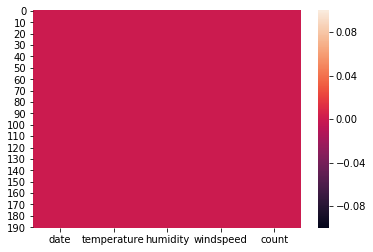

In [5]:
sns.heatmap(bikes.isnull())

In [6]:
bikes.dtypes

date            object
temperature    float64
humidity       float64
windspeed      float64
count          float64
dtype: object

In [7]:
bikes['date']=bikes['date'].str.replace('-','').astype(int)
bikes

,date,temperature,humidity,windspeed,count
0,20110103,2.716070,45.715346,21.414957,120.000000
1,20110104,2.896673,54.267219,15.136882,108.000000
2,20110105,4.235654,45.697702,17.034578,82.000000
3,20110106,3.112643,50.237349,10.091568,88.000000
4,20110107,2.723918,49.144928,15.738204,148.000000
5,20110108,1.967445,48.851252,17.035029,112.333333
6,20110109,1.210973,48.557576,18.331855,76.666667
7,20110110,0.454501,48.263900,19.628680,41.000000
8,20110111,1.361393,59.623460,12.414597,43.000000
9,20110112,1.541997,54.775880,25.432188,25.000000


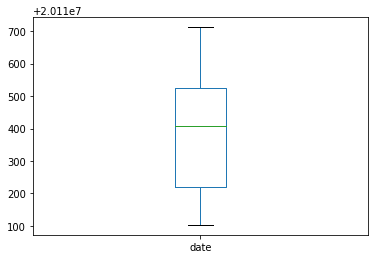

In [8]:
bikes['date'].plot.box()

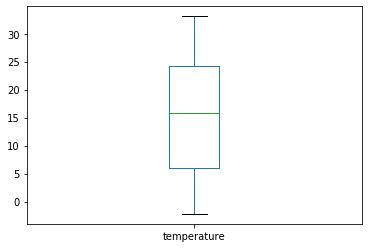

In [9]:
bikes['temperature'].plot.box()

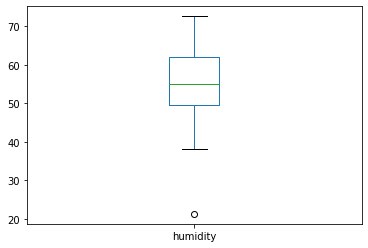

In [10]:
bikes['humidity'].plot.box()

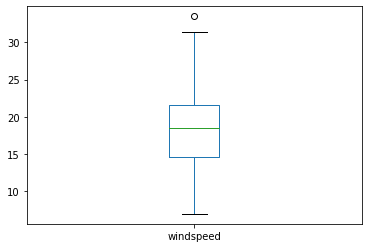

In [11]:
bikes['windspeed'].plot.box()

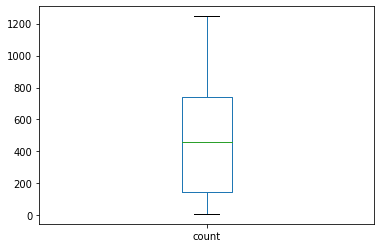

In [12]:
bikes['count'].plot.box()

In [13]:
from scipy import stats
z = np.abs(stats.zscore(bikes))
print(z)

[[1.5653505  1.27938042 1.22263292 0.55783569 1.06592246]
 [1.55990715 1.26104657 0.15067154 0.68875681 1.10332582]
 [1.55446379 1.12512099 1.22484456 0.3119449  1.18436645]
 [1.54902043 1.23912261 0.65580819 1.69056887 1.16566476]
 [1.54357707 1.27858373 0.79274114 0.56935655 0.97864794]
 [1.53813371 1.35537645 0.82955288 0.3118552  1.08981905]
 [1.53269035 1.43216917 0.86636462 0.05435384 1.20099016]
 [1.52724699 1.50896189 0.90317636 0.20314752 1.31216128]
 [1.52180363 1.41689937 0.52072335 1.22930146 1.30592738]
 [1.51636027 1.39856553 0.0869118  1.35550871 1.36203243]
 [1.51091691 1.43752746 0.99066227 1.30413686 1.32151212]
 [1.50547355 1.45835221 0.51887524 1.16675442 1.27164096]
 [1.50003019 1.38801575 0.04775526 1.09513197 1.30670662]
 [1.49458684 1.31767929 0.61438577 1.02350952 1.34177227]
 [1.48914348 1.24734283 1.18101627 0.95188707 1.37683793]
 [1.48370012 1.17700638 1.74764678 0.88026462 1.41190358]
 [1.47825676 0.79627659 0.90828594 0.00860026 1.19683423]
 [1.4728134  0

In [14]:
threshold = 3
print(np.where(z > 3))

(array([66], dtype=int64), array([2], dtype=int64))


In [15]:
print(z[66][2])

4.283051099657777


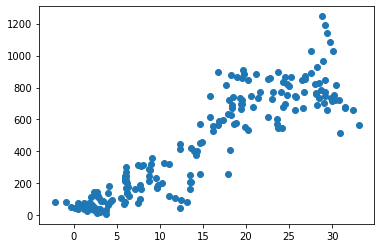

In [16]:
plt.scatter(bikes['temperature'],bikes['count'])
plt.show()

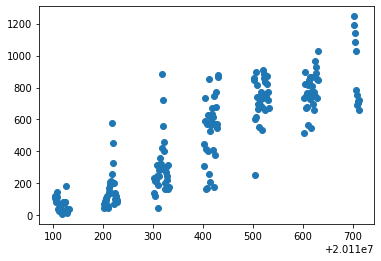

In [17]:
plt.scatter(bikes['date'],bikes['count'])
plt.show()

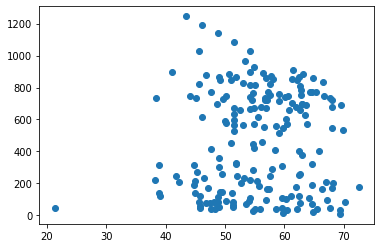

In [18]:
plt.scatter(bikes['humidity'],bikes['count'])
plt.show()

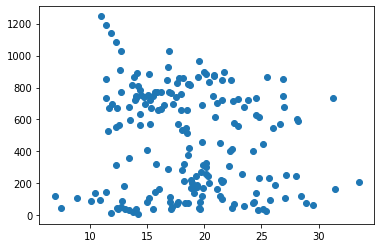

In [19]:
plt.scatter(bikes['windspeed'],bikes['count'])
plt.show()

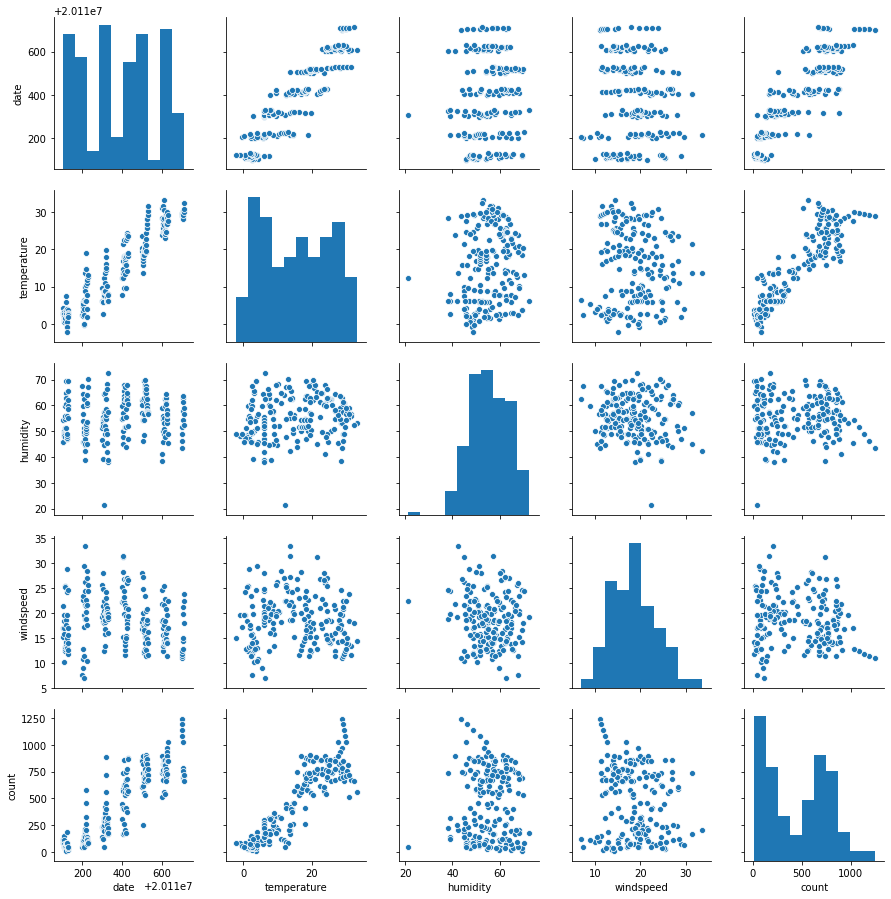

In [20]:
sns.pairplot(bikes)

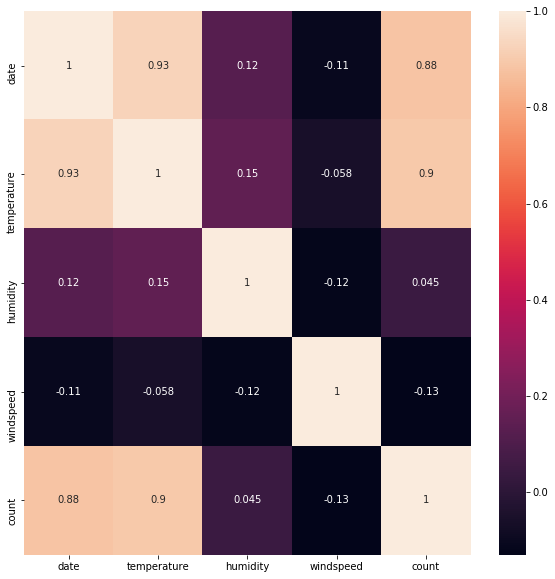

In [21]:
corr_hmap=bikes.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [22]:
bikes_new=bikes[(z<3).all(axis=1)]
bikes_new

,date,temperature,humidity,windspeed,count
0,20110103,2.716070,45.715346,21.414957,120.000000
1,20110104,2.896673,54.267219,15.136882,108.000000
2,20110105,4.235654,45.697702,17.034578,82.000000
3,20110106,3.112643,50.237349,10.091568,88.000000
4,20110107,2.723918,49.144928,15.738204,148.000000
5,20110108,1.967445,48.851252,17.035029,112.333333
6,20110109,1.210973,48.557576,18.331855,76.666667
7,20110110,0.454501,48.263900,19.628680,41.000000
8,20110111,1.361393,59.623460,12.414597,43.000000
9,20110112,1.541997,54.775880,25.432188,25.000000


In [23]:
bikes = bikes_new

In [24]:
bikes.shape

(190, 5)

In [25]:
x=bikes.iloc[:,1:-1]
x.head()

,temperature,humidity,windspeed
0,2.716070,45.715346,21.414957
1,2.896673,54.267219,15.136882
2,4.235654,45.697702,17.034578
3,3.112643,50.237349,10.091568
4,2.723918,49.144928,15.738204


In [26]:
y=bikes.iloc[:,-1]
y.head()

0    120.0
1    108.0
2     82.0
3     88.0
4    148.0
Name: count, dtype: float64

In [27]:
x.shape

(190, 3)

In [28]:
y.shape

(190,)

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=47)

In [45]:
x_train.shape

(133, 3)

In [46]:
y_train.shape

(133,)

In [47]:
lr=LinearRegression()

In [48]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
lr.coef_

array([30.72439468, -6.93776794, -6.23183592])

In [50]:
lr.intercept_

500.8022046661683

In [51]:
bikes.columns

Index(['date', 'temperature', 'humidity', 'windspeed', 'count'], dtype='object')

In [52]:
lr.score(x_train,y_train)

0.8375193607536345

In [53]:
pred=lr.predict(x_test)
print("predicted count:",pred)
print("actual count",y_test)

predicted count: [  81.47420983  133.63484451  980.60034446  324.56243291  116.17261352
  244.20759684   17.836219    152.67719898  481.53615604  915.97995883
  956.82039454  598.42343861  147.87182569  179.6868198   613.00100753
  878.34973265  556.32482041  719.62122998    9.66756086  925.59080361
  519.98858125  532.17156787  755.48529736  480.94788841   62.24525563
  356.60356219   49.50837082 1060.55067016  714.21122352  812.73982455
  118.9768017    45.35478977  185.01220023   69.99802     105.97637304
  305.76927018  213.86377507  827.57952737  843.53212918   65.70084882
  590.81731081  968.38867989  898.09831292  685.47395317  995.9389099
  778.29145992  539.98841795  243.83408719  935.26658462  826.69078732
  601.34181619   43.81345657  467.6631697   793.79504208  969.10176724
  464.21088274  250.29929692]
actual count 36       64.000000
0       120.000000
182    1084.750000
92      167.000000
5       112.333333
86      168.000000
20       82.333333
32       88.000000
130     

In [54]:
print('error:')
print(mean_squared_error(y_test,pred))

error:
20877.642515945994


In [55]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8117013349970484
